In [ ]:
# Demonstration of iTEBD within OQuPy
# Uses the original iTEBD code by Valentin Link from https://github.com/val-link/iTEBD-TEMPO.git.
# Minimally modified by Paul Eastham to take a bath correlation object from OQuPy.
# The resulting object can turned into a new proces tensor subclass, TTInvariantProcessTensor, which should function as all other PTs in OQuPy
# Todo: fully integrate the creation of iTEBD process tensors so we can skip calls to iTEBD_TEMPO_oqupy class.

In [1]:
import oqupy as oqupy
from oqupy.iTEBD_TEMPO_useoqupybath import iTEBD_TEMPO_oqupy
from oqupy.process_tensor import TTInvariantProcessTensor
from oqupy.tti_tempo import TTITempo
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sigma_z = oqupy.operators.sigma("z")
sigma_x = oqupy.operators.sigma("x")
sigma_y = oqupy.operators.sigma("y")
omega_cutoff = 3.04 
alpha = 0.126
temperature = 0.1309
correlations = oqupy.PowerLawSD(alpha=alpha,
                                zeta=3,
                                cutoff=omega_cutoff,
                                cutoff_type='gaussian',
                                temperature=temperature)
bath = oqupy.Bath(sigma_x/2.0, correlations)
# uses a modified version of Link's iTEBD_TEMPO class, which will take the bath correlation defined in OQuPy
# other parameters remain as in the original, i.e. eigenvalues of the coupling operator, timestep, cut-off.
Delta=0.1
parameters=oqupy.TempoParameters(dt=Delta,epsrel=1e-7,dkmax=100)
#MyiTEBD_TEMPO_oqupy = iTEBD_TEMPO_oqupy(np.diagonal(sigma_z/2), Delta, correlations, 100)
#MyiTEBD_TEMPO_oqupy.compute_f(rank=100, rtol=1e-7)
#pt=TTInvariantProcessTensor(MyiTEBD_TEMPO_oqupy) # this can now be used like a normal OQuPy process tensor



In [6]:
detuning = lambda t: 0.0 * t
def gaussian_shape(t, area = 1.0, tau = 1.0, t_0 = 0.0):
    return area/(tau*np.sqrt(np.pi)) * np.exp(-(t-t_0)**2/(tau**2))

def hamiltonian_t(t):
    return detuning(t)/2.0 * sigma_z \
           + gaussian_shape(t, area = np.pi/2.0, tau = 1)/2.0 * sigma_y

system = oqupy.TimeDependentSystem(hamiltonian_t)

Rho_0=oqupy.operators.spin_dm('z-')

dynamics = oqupy.compute_dynamics(
       process_tensor=pt,        
       system=system,
       initial_state=Rho_0,
       start_time=-5.0,
       num_steps=200)

t, s_x = dynamics.expectations(sigma_x, real=True)
_, s_y = dynamics.expectations(sigma_y, real=True)
_, s_z = dynamics.expectations(sigma_z, real=True)


NameError: name 'pt' is not defined

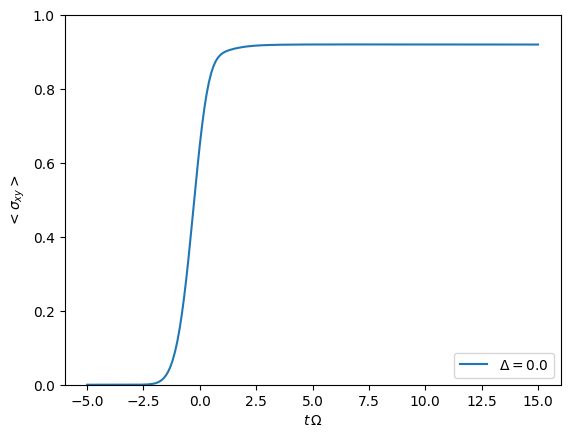

In [8]:
t, s_x = dynamics.expectations(sigma_x, real=True)
t, s_y = dynamics.expectations(sigma_y, real=True)
s_xy = np.sqrt(s_x**2 + s_y**2)
plt.plot(t, s_xy, label=r'$\Delta = 0.0$')
plt.xlabel(r'$t\,\Omega$')
plt.ylabel(r'$<\sigma_{xy}>$')
plt.ylim((0.0,1.0))
plt.legend(loc=4)

In [7]:
# ok, let's see if we can make this more OQuPylike
# MyiTEBD_TEMPO_oqupy = iTEBD_TEMPO_oqupy(np.diagonal(sigma_z/2), Delta, correlations, 100)
# MyiTEBD_TEMPO_oqupy.compute_f(rank=100, rtol=1e-7)
# pt=TTInvariantProcessTensor(MyiTEBD_TEMPO_oqupy)

# We would like to (i)instantiate a TT process tensor with a set of tempo parameters and a bath, (ii)then compute its f, 
# 
bath = oqupy.Bath(sigma_z/2.0, correlations)
pt2=TTITempo(bath,0.0,parameters)


building influence functional: 100%|██████████| 100/100 [00:00<00:00, 234.21it/s]

rank  83


--> Compute dynamics:
100.0%  200 of  200 [########################################] 00:00:02
Elapsed time: 2.7s


C:\Users\preas\AppData\Local\Temp\ipykernel_22508\259211133.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=4)


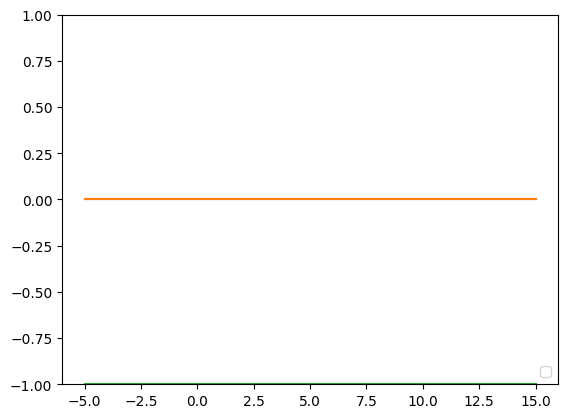

In [8]:
detuning = lambda t: 0.0 * t
def gaussian_shape(t, area = 1.0, tau = 1.0, t_0 = 0.0):
    return area/(tau*np.sqrt(np.pi)) * np.exp(-(t-t_0)**2/(tau**2))

def hamiltonian_t(t):
    return detuning(t)/2.0 * sigma_z \
           + gaussian_shape(t, area = np.pi/2.0, tau = 1)/2.0 * sigma_y

def hamiltonian_t(t):
    return 0.0*sigma_z

system = oqupy.TimeDependentSystem(hamiltonian_t)

Rho_0=oqupy.operators.spin_dm('z-')

dynamics2 = oqupy.compute_dynamics(
       process_tensor=pt2._process_tensor,        
       system=system,
       initial_state=Rho_0,
       start_time=-5.0,
       num_steps=200)

t, s_x = dynamics2.expectations(sigma_x, real=True)
_, s_y = dynamics2.expectations(sigma_y, real=True)
_, s_z = dynamics2.expectations(sigma_z, real=True)

plt.plot(t,s_x)
plt.plot(t,s_y)
plt.plot(t,s_z)
plt.ylim((-1.0,1.0))
plt.legend(loc=4)